# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import tree

In [ ]:
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['GS.csv']))

Saving GS.csv to GS.csv


# **Data Preprocessing and Visualization**

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-05-04,76.0000,77.250,70.0000,70.3750,53.576797,22320900
1,1999-05-05,69.8750,69.875,66.2500,69.1250,52.625153,7565700
2,1999-05-06,68.0000,69.375,67.0625,67.9375,51.721100,2905700
3,1999-05-07,67.9375,74.875,66.7500,74.1250,56.431648,4862300
4,1999-05-10,73.3750,73.500,70.2500,70.6875,53.814709,2589400


**Heat Map of missing value data**

<Axes: >

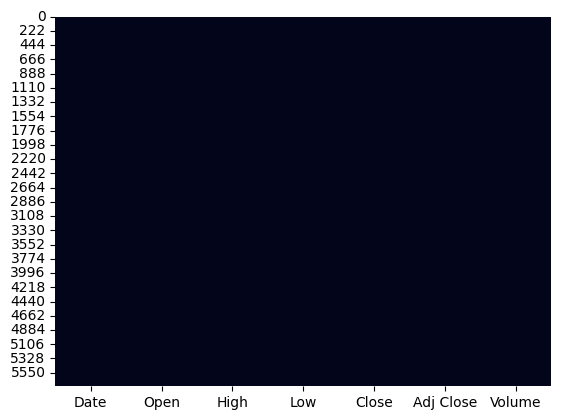

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
df['Date'].max()

'2022-03-24'

In [ ]:
df['Date'].min()

'1999-05-04'

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5762.000000,5762.000000,5762.000000,5762.000000,5762.000000,5.762000e+03
mean,160.717986,162.655643,158.761075,160.732162,140.676221,5.264446e+06
std,71.225751,71.755243,70.613907,71.177093,73.187668,6.077306e+06
min,54.000000,54.540001,47.410000,52.000000,42.490295,1.076000e+05
25%,100.552502,102.277499,99.162501,100.705002,81.146532,2.487625e+06
50%,157.605004,159.699997,156.004998,157.750000,134.576713,3.553000e+06
75%,199.507496,201.847496,197.419995,199.502499,177.186802,5.578525e+06
max,423.119995,426.160004,413.760010,423.850006,419.154236,1.145907e+08


**Pairplot of Data**

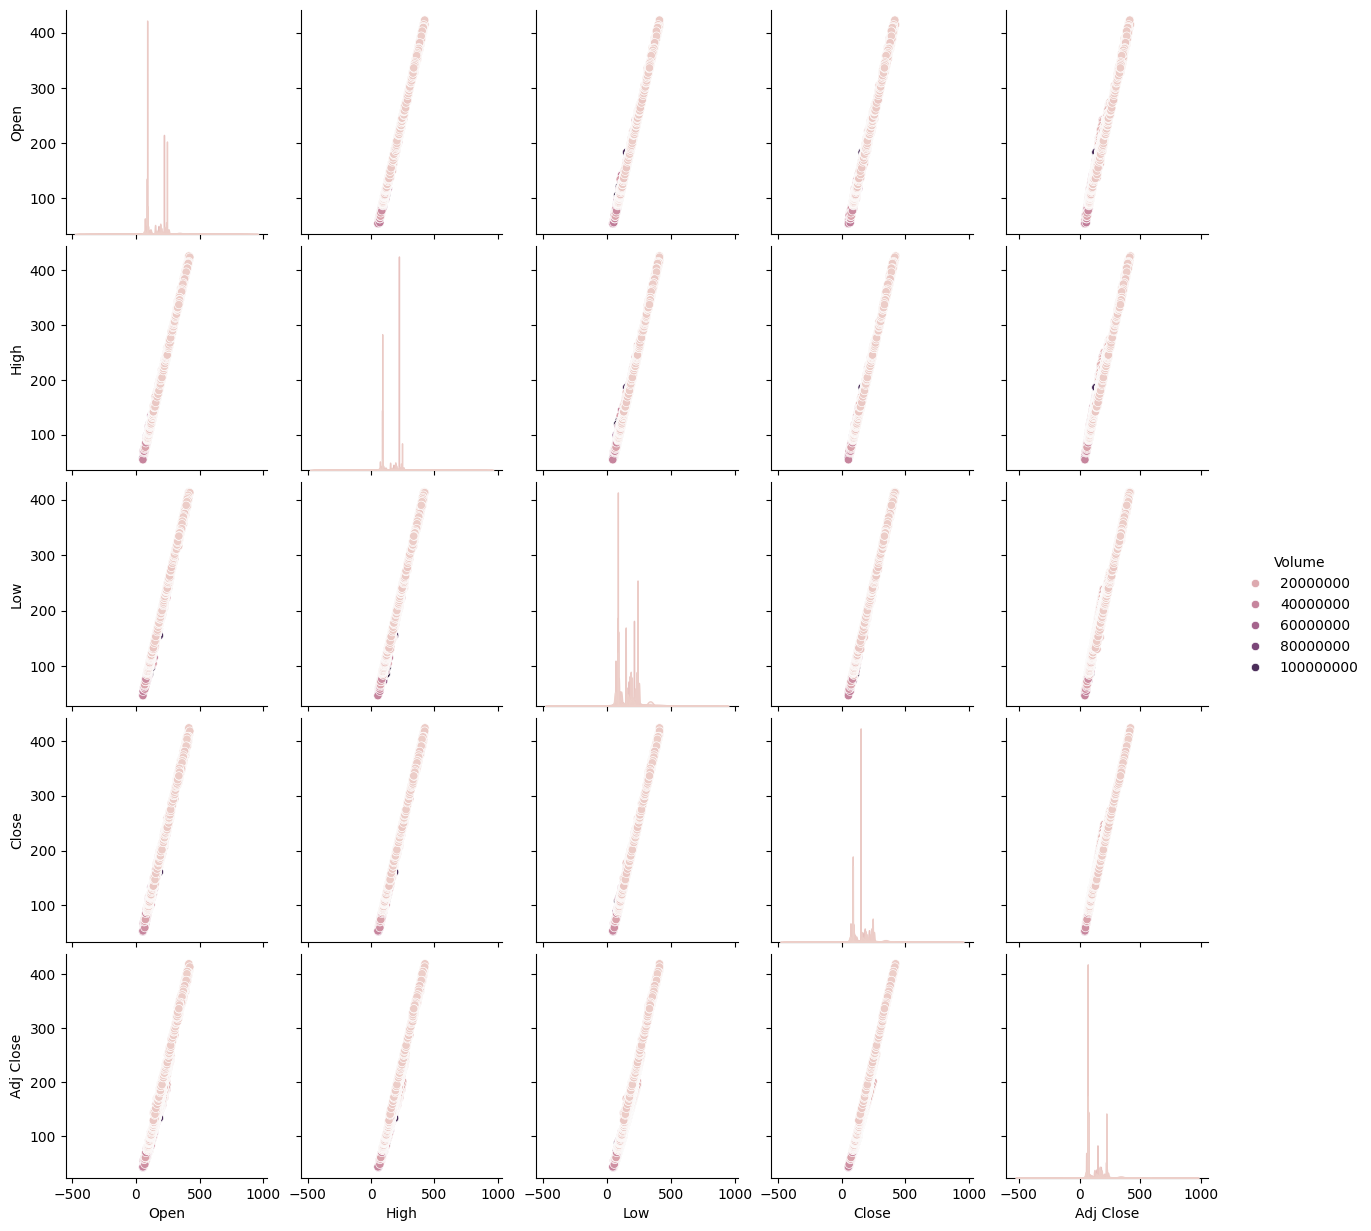

In [ ]:
sns.pairplot(data = df, hue='Volume')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year']= df['Date'].dt.year
df['Month']= df['Date'].dt.month
df['Day']= df['Date'].dt.day

In [ ]:
df.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
3943,2015-01-05,193.059998,194.039993,187.479996,188.339996,166.672821,3413200,2015,1,5
2204,2008-02-07,185.770004,193.770004,185.320007,190.460007,155.166962,10839200,2008,2,7
2972,2011-02-24,162.199997,163.899994,161.320007,163.440002,137.016006,4619300,2011,2,24
2814,2010-07-12,137.610001,138.309998,136.029999,137.250000,114.519875,4728900,2010,7,12
5402,2020-10-20,206.699997,211.380005,206.470001,208.029999,202.141205,3335500,2020,10,20
790,2002-06-26,69.349998,71.250000,69.029999,70.800003,54.841389,5441300,2002,6,26
729,2002-04-01,89.400002,89.449997,88.000000,88.470001,68.421967,2711500,2002,4,1
2187,2008-01-14,200.169998,202.220001,199.029999,201.649994,163.994720,9400200,2008,1,14
5111,2019-08-26,198.270004,199.710007,198.000000,199.649994,188.219315,1441900,2019,8,26
1967,2007-03-01,197.119995,202.699997,194.080002,199.660004,161.574844,14141300,2007,3,1


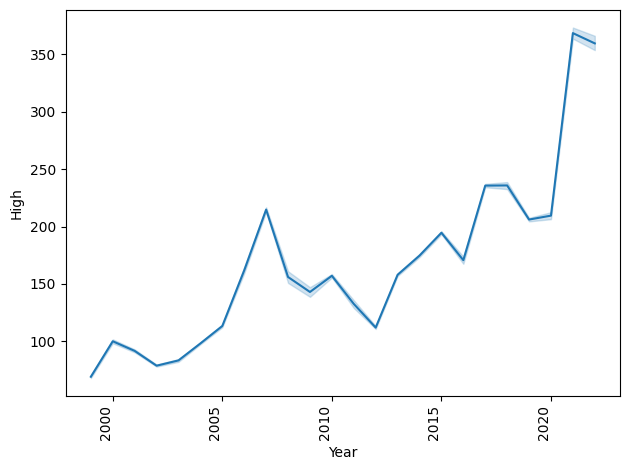

In [ ]:
sns.lineplot(data = df, x='Year', y='High')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


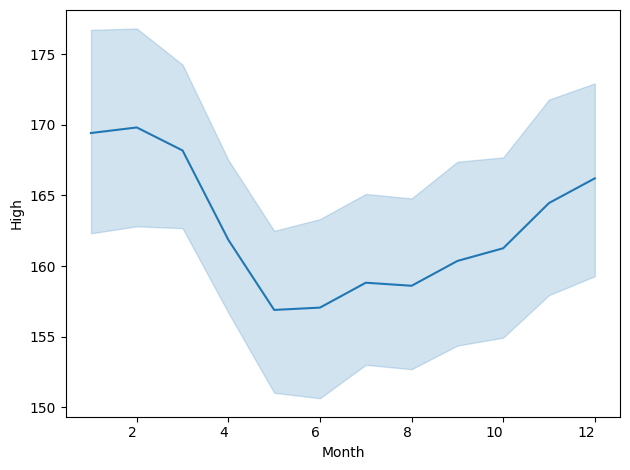

In [ ]:
sns.lineplot(data = df, x='Month', y='High')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


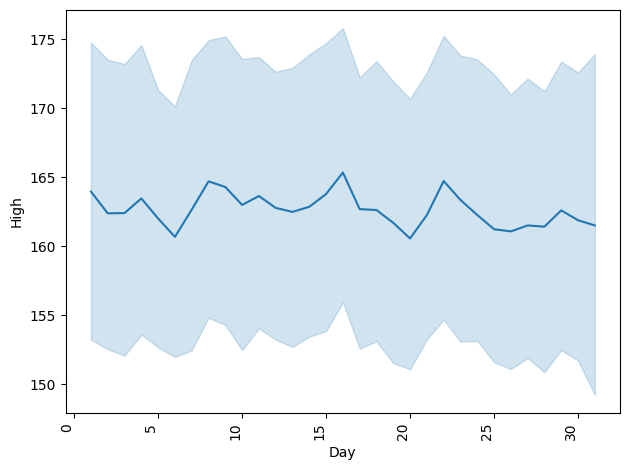

In [ ]:
sns.lineplot(data = df, x='Day', y='High')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


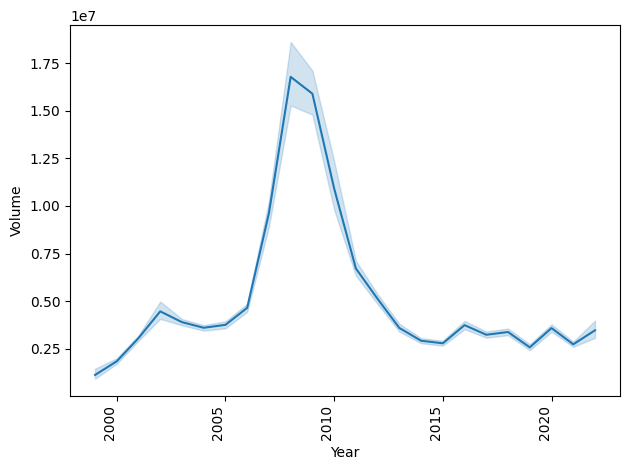

In [ ]:
sns.lineplot(data = df, x='Year', y='Volume')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


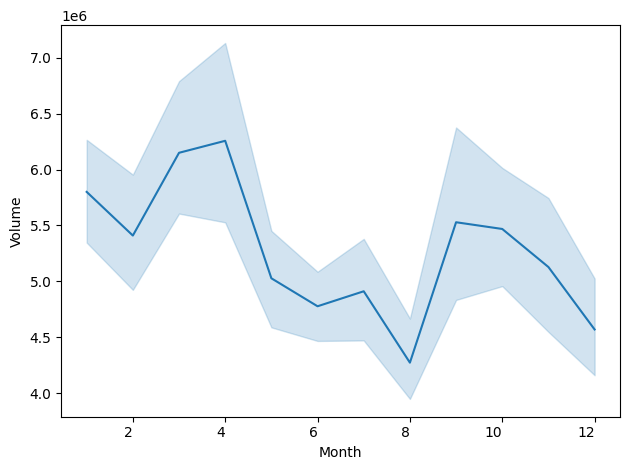

In [ ]:
sns.lineplot(data = df, x='Month', y='Volume')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


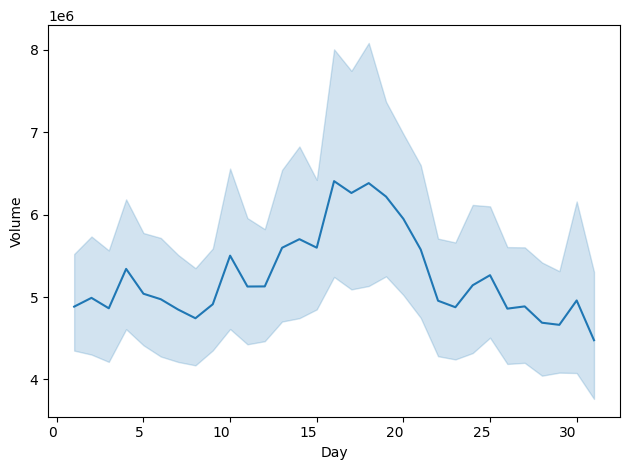

In [ ]:
sns.lineplot(data = df, x='Day', y='Volume')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [ ]:
# We have created a categorical variable for gold price indicating high and low price to test classification models

vol_mean= df['Volume'].mean()
df['Volume_Category'] = df['Volume'].apply(lambda x: 'High' if x > vol_mean else 'Low')

In [ ]:
X = df.drop(['Volume', 'Volume_Category', 'Date'], axis=1)
y = df['Volume']

In [ ]:
y.head()

0    22320900
1     7565700
2     2905700
3     4862300
4     2589400
Name: Volume, dtype: int64

In [ ]:
X.sample(11)

,Open,High,Low,Close,Adj Close,Year,Month,Day
4391,167.600006,167.630005,165.509995,167.419998,151.976578,2016,10,13
2789,142.169998,145.869995,141.710007,142.250000,118.691788,2010,6,4
80,64.000000,64.875000,62.750000,62.750000,47.874786,1999,8,26
5482,310.000000,312.920013,309.220001,311.959991,304.781464,2021,2,16
498,92.699997,93.739998,91.150002,91.400002,70.387123,2001,4,24
1751,166.059998,169.309998,166.059998,168.550003,135.301636,2006,4,20
1958,217.940002,218.839996,216.410004,216.820007,175.461548,2007,2,15
4858,237.889999,239.669998,237.580002,239.339996,222.083252,2018,8,22
4050,210.000000,210.440002,207.619995,209.020004,186.133102,2015,6,9
3601,158.410004,160.699997,157.750000,157.899994,137.021637,2013,8,26


# **Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)
X_rescaled = pd.DataFrame(X_, columns = X.columns)


In [ ]:
X_rescaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5762 entries, 0 to 5761
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5762 non-null   float64
 1   High       5762 non-null   float64
 2   Low        5762 non-null   float64
 3   Close      5762 non-null   float64
 4   Adj Close  5762 non-null   float64
 5   Year       5762 non-null   float64
 6   Month      5762 non-null   float64
 7   Day        5762 non-null   float64
dtypes: float64(8)
memory usage: 360.2 KB


# **Multiple Linear Regression**

In [ ]:
train_X, valid_X, train_y, valid_y = train_test_split(X_rescaled, y, test_size=0.3, random_state=3)

In [ ]:
from sklearn.linear_model import LinearRegression

re_prices = LinearRegression()

re_prices.fit(train_X, train_y)

LinearRegression()

In [ ]:
X_rescaled.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Year', 'Month', 'Day'], dtype='object')

In [ ]:
# Regression functional form
# Price = Intercept + b1*BEDS + b2*BATHS + b3*SqFt + b4*LotSize + b5*MFR + b6*SFR + b7*TownHouse

re_prices.intercept_

10083622.595837783

In [ ]:
re_prices.coef_

array([ 1.44837595e+08,  4.22053142e+08, -6.59013593e+08,  1.76769783e+08,
       -9.71522642e+07,  8.59899398e+06, -3.64287412e+04,  4.67396162e+05])

In [ ]:
train_X.head()

,Open,High,Low,Close,Adj Close,Year,Month,Day
5206,0.511351,0.508180,0.529494,0.511255,0.500408,0.913043,0.000000,0.300000
323,0.156453,0.175811,0.175624,0.182533,0.131413,0.043478,0.636364,0.333333
2766,0.254226,0.258624,0.270588,0.262202,0.217540,0.478261,0.363636,0.066667
4724,0.529963,0.530461,0.523761,0.530590,0.497458,0.826087,0.090909,0.266667
5257,0.272540,0.289731,0.267258,0.277343,0.282508,0.913043,0.181818,0.800000


In [ ]:
# Additional information on regression model metrics
# https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score, explained_variance_score

import math

In [ ]:
pred_y = re_prices.predict(valid_X)

In [ ]:
print('Regression model performance evaluation')
print('R2: ', r2_score(valid_y, pred_y))
print('MAE: ', mean_absolute_error(valid_y, pred_y))
print('RMSE: ', math.sqrt(mean_squared_error(valid_y, pred_y)))
print('Max error: ', max_error(valid_y, pred_y))

mse = mean_squared_error(valid_y, pred_y)
print("Mean Squared Error:", mse)

Regression model performance evaluation
R2:  0.43611221826476576
MAE:  2535282.1068034773
RMSE:  4398586.3017242085
Max error:  41402239.03620674
Mean Squared Error: 19347561453715.848


# **Gradient Boosting Regression**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X is your feature matrix and y is your target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rescaled, y, test_size=0.3, random_state=42)

# Train the GBM model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model


print('R2: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_pred)))
print('Max error: ', max_error(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


R2:  0.7066390624724916
MAE:  1475983.0727126652
RMSE:  2808073.075441114
Max error:  59224773.76236253
Mean Squared Error: 7885274397017.318


# **eXtreme Gradient Boosting**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X is your feature matrix and y is your target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',  # Specify regression objective
    'eval_metric': 'rmse',             # Specify evaluation metric
    'max_depth': 6,                    # Maximum tree depth
    'learning_rate': 0.1               # Learning rate
}

num_boost_round = 100  # Number of boosting rounds

model = xgb.train(params, dtrain, num_boost_round=num_boost_round)

# Make predictions on the test data
y_pred = model.predict(dtest)

# Evaluate the model
print('R2: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_pred)))
print('Max error: ', max_error(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


R2:  0.8093654600737545
MAE:  1218807.3973330443
RMSE:  2044881.8721600191
Max error:  16846204.0
Mean Squared Error: 4181541871088.6646


# **Cat Boost Regression**

In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X is your feature matrix and y is your target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create CatBoostRegressor model
model = CatBoostRegressor(iterations=1000,  # Number of trees (boosting rounds)
                          learning_rate=0.1,  # Learning rate
                          depth=6,           # Depth of trees
                          loss_function='RMSE',  # Loss function
                          verbose=0)        # Set verbose to 0 to suppress output

# Train the model
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose_eval=False)

# Make predictions on the test data
y_pred = model.predict(X_test)



# Evaluate the model
print('R2: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_pred)))
print('Max error: ', max_error(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)



R2:  0.8226871061159695
MAE:  1173388.8466675817
RMSE:  1972139.30423523
Max error:  17690294.96171954
Mean Squared Error: 3889333435309.4165


# **Light Gradient Boosting**

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X is your feature matrix and y is your target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Set parameters for LightGBM
params = {
    'objective': 'regression', # Regression task
    'metric': 'rmse',          # Root Mean Squared Error as evaluation metric
    'num_leaves': 31,          # Maximum tree leaves
    'learning_rate': 0.05,     # Learning rate
    'feature_fraction': 0.9,   # Feature fraction
    'bagging_fraction': 0.8,   # Bagging fraction
    'bagging_freq': 5,         # Bagging frequency
    'verbose': 0               # No output while training
}

# Train the model
num_round = 100
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Make predictions on the test data
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

# Evaluate the model
print('R2: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_pred)))
print('Max error: ', max_error(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
R2:  0.7829844371869036
MAE:  1292730.079121819
RMSE:  2181789.6105300514
Max error:  17101904.485488392
Mean Squared Error: 4760205904616.873


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X is your feature matrix and y is your target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Set parameters for LightGBM with histogram-based splitting
params = {
    'boosting_type': 'gbdt',         # Gradient Boosting Decision Trees
    'objective': 'regression',        # Regression task
    'metric': 'rmse',                 # Root Mean Squared Error as evaluation metric
    'num_leaves': 31,                 # Maximum tree leaves
    'learning_rate': 0.05,            # Learning rate
    'feature_fraction': 0.9,          # Feature fraction
    'bagging_fraction': 0.8,          # Bagging fraction
    'bagging_freq': 5,                # Bagging frequency
    'histogram_pool_size': 2048,      # Size of histogram pool
    'verbose': 0                      # No output while training
}

# Train the model
num_round = 100
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Make predictions on the test data
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

# Evaluate the model
print('R2: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_pred)))
print('Max error: ', max_error(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
R2:  0.7829844371869036
MAE:  1292730.079121819
RMSE:  2181789.6105300514
Max error:  17101904.485488392
Mean Squared Error: 4760205904616.873


# **Bayesian Optimization for Hyperparameter Tuning**

In [ ]:
pip install scikit-optimize

In [ ]:
pip install tpot

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from skopt import BayesSearchCV
from tpot import TPOTRegressor

# Assuming X is your feature matrix and y is your target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the search space for hyperparameter tuning
param_space = {
    'learning_rate': (0.01, 0.5),
    'n_estimators': (100, 1000),
    'max_depth': (3, 10),
    'subsample': (0.5, 1.0),
    'colsample_bytree': (0.5, 1.0)
}

# Perform Bayesian Optimization for hyperparameter tuning
bayes_cv = BayesSearchCV(
    xgb.XGBRegressor(),          # XGBoost regressor
    param_space,
    n_iter=50,                   # Number of iterations
    cv=3,                        # Number of cross-validation folds
    verbose=1,
    n_jobs=-1
)

# Fit the Bayesian Optimization model
bayes_cv.fit(X_train, y_train)

# Get the best hyperparameters
best_params = bayes_cv.best_params_

# Train XGBoost model with the best hyperparameters
best_model = xgb.XGBRegressor(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model
print('R2: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_pred)))
print('Max error: ', max_error(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)



Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

# **TPOT Regression**

In [ ]:
# Perform AutoML with TPOT
tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)

# Evaluate the best pipeline found by TPOT
y_pred_tpot = tpot.predict(X_test)



Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -13101084515701.201

Generation 2 - Current best internal CV score: -12795746650151.895

Generation 3 - Current best internal CV score: -12368111457664.299

Generation 4 - Current best internal CV score: -11371966693812.738

Generation 5 - Current best internal CV score: -9861161394437.432

Best pipeline: ExtraTreesRegressor(RidgeCV(input_matrix), bootstrap=True, max_features=1.0, min_samples_leaf=1, min_samples_split=19, n_estimators=100)
R2:  0.8123092142809325
MAE:  1210751.126358972
RMSE:  2029032.0440576063
Max error:  17331928.0
Mean Squared Error (TPOT): 3262218048913.181


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


In [ ]:
# Evaluate the model

print("TPOT Model")

print('R2: ', r2_score(y_test, y_pred_tpot))
print('MAE: ', mean_absolute_error(y_test, y_pred_tpot))
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_pred_tpot)))
print('Max error: ', max_error(y_test, y_pred_tpot))

mse_tpot = mean_squared_error(y_test, y_pred_tpot)
print("Mean Squared Error (TPOT):", mse_tpot)

TPOT Model
R2:  0.8512770035394267
MAE:  1096417.5444426453
RMSE:  1806161.135921483
Max error:  17376087.7446043
Mean Squared Error (TPOT): 3262218048913.181
